In [66]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period = "max")
tesla_data.reset_index(inplace = True)
tesla_data.head(5)







,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [13]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
url = " https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
data = requests.get(url).text
soup = BeautifulSoup(data,'html.parser')
soup.find_all('table')
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in soup.find_all("tbody")[1].find_all('tr'):
    col = row.find_all("td")
    Date = col[0].text
    Revenue = col[1].text
    tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")
    tesla_revenue = tesla_revenue._append({"Date":Date, "Revenue":Revenue}, ignore_index = True) 
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
print(tesla_revenue.tail(5))










          Date Revenue
48  2010-09-30     $31
49  2010-06-30     $28
50  2010-03-31     $21
52  2009-09-30     $46
53  2009-06-30     $27


In [90]:
import yfinance as yf
import pandas as pd
gme = yf.Ticker("GME")
gme_data = gme.history(period = "max")
gme_data.reset_index(inplace = True)
gme_data.head(5)


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [116]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
url = "  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
data = requests.get(url).text
soup = BeautifulSoup(data,'html.parser')
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in soup.find_all("tbody")[1].find_all('tr'):
    col = row.find_all("td")
    Date = col[0].text
    Revenue = col[1].text
    gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")
    gme_revenue = gme_revenue._append({"Date":date, "Revenue":Revenue}, ignore_index = True) 
print(gme_revenue.tail(5))


          Date Revenue
57  2009-06-30  $1,667
58  2009-06-30    $534
59  2009-06-30    $416
60  2009-06-30    $475
61  2009-06-30    $709


         Date  Revenue
48 2010-09-30     31.0
49 2010-06-30     28.0
50 2010-03-31     21.0
52 2009-09-30     46.0
53 2009-06-30     27.0


C:\Users\rohit\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



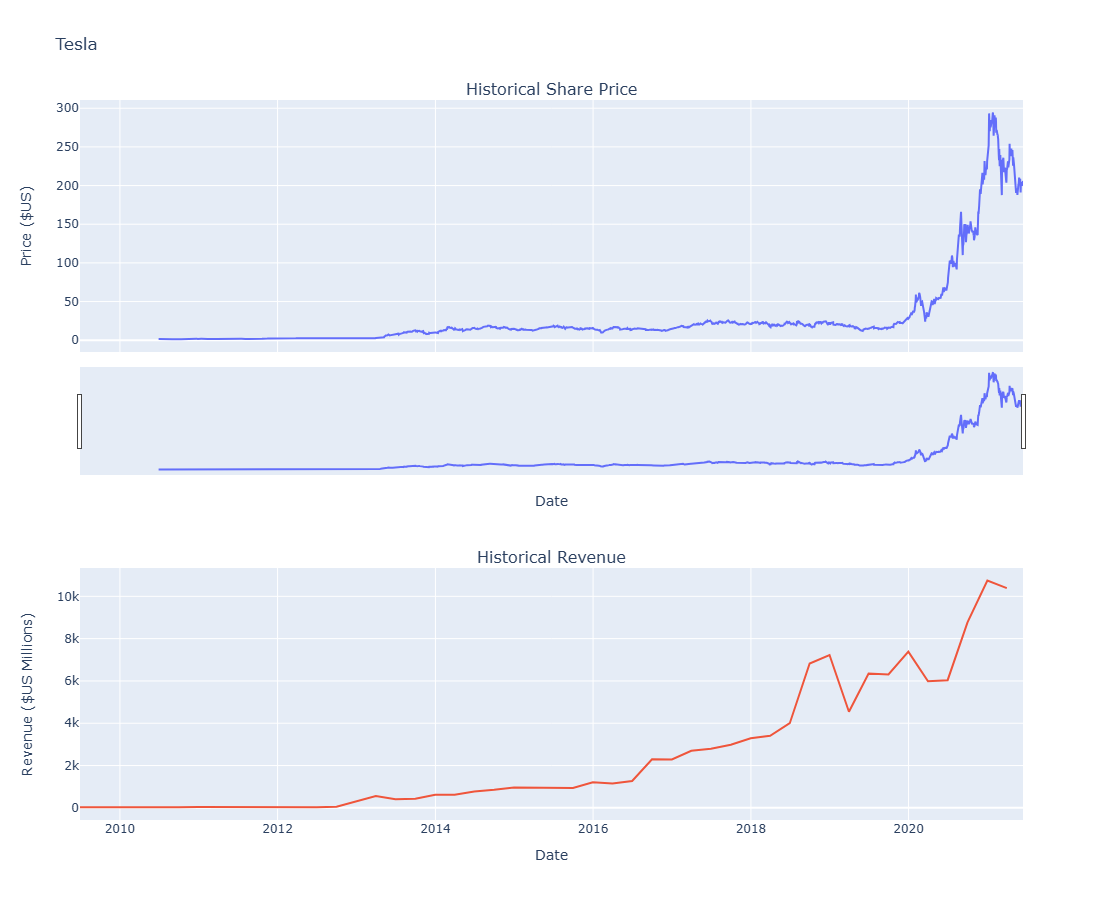

In [44]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
from plotly.subplots import make_subplots
import plotly.graph_objects as go
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
data = requests.get(url).text
soup = BeautifulSoup(data, 'html.parser')
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in soup.find_all("tbody")[1].find_all('tr'):
    col = row.find_all("td")
    Date = col[0].text.strip()
    Revenue = col[1].text.strip()
    tesla_revenue = tesla_revenue._append({"Date": Date, "Revenue": Revenue}, ignore_index=True)

tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True).str.strip()

tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')

tesla_revenue.dropna(subset=['Revenue'], inplace=True)

tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

print(tesla_revenue.tail(5))

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(
        rows=2, cols=1,
        shared_xaxes=True,
        subplot_titles=("Historical Share Price", "Historical Revenue"),
        vertical_spacing=0.3
    )
    stock_data_specific = stock_data[stock_data['Date'] <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data['Date'] <= '2021-04-30']

    
    fig.add_trace(
        go.Scatter(
            x=stock_data_specific['Date'],
            y=stock_data_specific['Close'].astype("float"),
            name="Share Price"
        ),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(
            x=revenue_data_specific['Date'],
            y=revenue_data_specific['Revenue'],
            name="Revenue"
        ),
        row=2, col=1
    )
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)

    
    fig.update_layout(
        showlegend=False,
        height=900,
        title=stock,
        xaxis_rangeslider_visible=True
    )
    fig.show()
make_graph(tesla_data, tesla_revenue, 'Tesla')

    

C:\Users\rohit\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



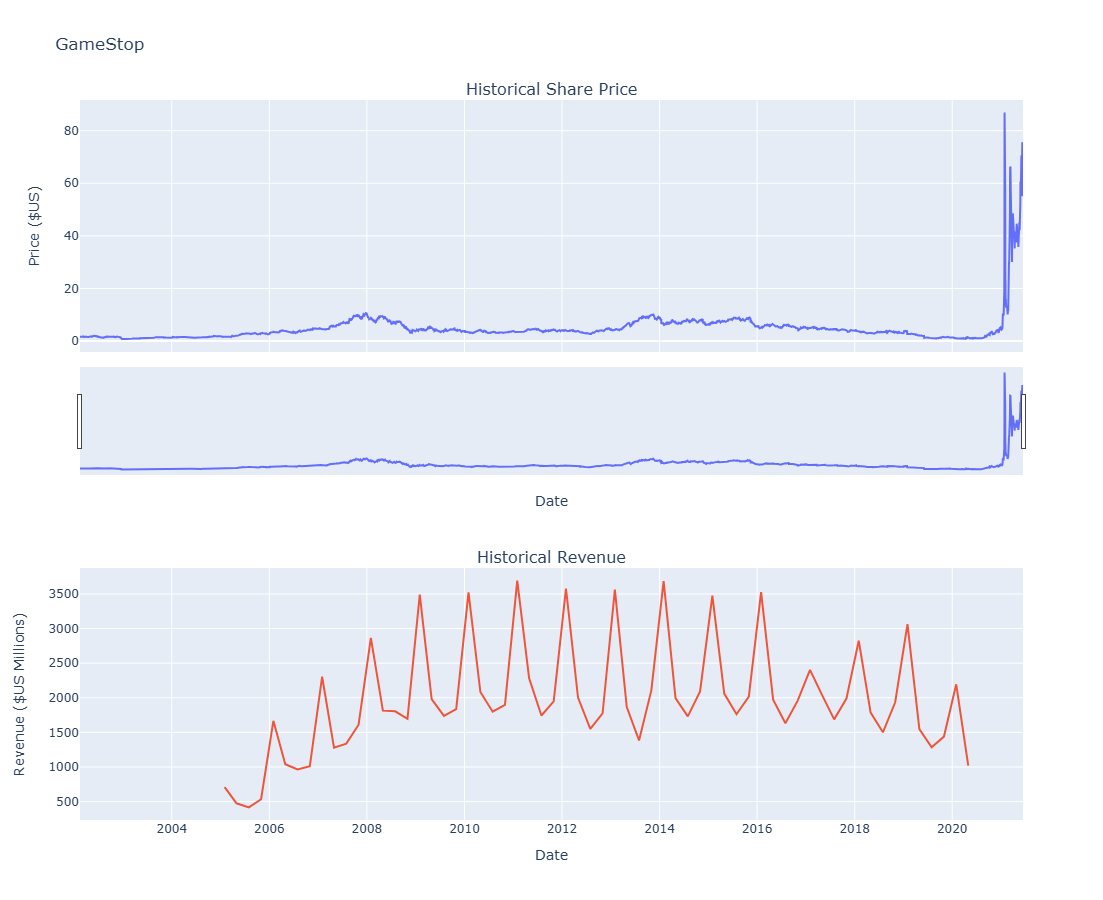

In [42]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
from plotly.subplots import make_subplots
import plotly.graph_objects as go

gme = yf.Ticker("GME")
gme_data = gme.history(period = "max")
gme_data.reset_index(inplace = True)


url = "  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
data = requests.get(url).text
soup = BeautifulSoup(data,'html.parser')
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in soup.find_all("tbody")[1].find_all('tr'):
    col = row.find_all("td")
    Date = col[0].text
    Revenue = col[1].text
    gme_revenue = gme_revenue._append({"Date":Date, "Revenue":Revenue}, ignore_index = True) 
gme_revenue['Revenue'] = gme_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True).str.strip()

gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')

gme_revenue.dropna(subset=['Revenue'], inplace=True)

gme_data['Date'] = pd.to_datetime(gme_data['Date'])
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(
        rows=2, cols=1,
        shared_xaxes=True,
        subplot_titles=("Historical Share Price", "Historical Revenue"),
        vertical_spacing=0.3
    )
    stock_data_specific = stock_data[stock_data['Date'] <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data['Date'] <= '2021-04-30']

    
    fig.add_trace(
        go.Scatter(
            x=stock_data_specific['Date'],
            y=stock_data_specific['Close'].astype("float"),
            name="Share Price"
        ),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(
            x=revenue_data_specific['Date'],
            y=revenue_data_specific['Revenue'],
            name="Revenue"
        ),
        row=2, col=1
    )
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)

    
    fig.update_layout(
        showlegend=False,
        height=900,
        title=stock,
        xaxis_rangeslider_visible=True
    )
    fig.show()
make_graph(gme_data, gme_revenue, 'GameStop')


